Hello!

In [12]:
import xarray as xr
import intake
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
cat = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [11]:
query = dict(
    variable_id=['tas'],
    table_id='Amon',
    experiment_id=['historical'],
    grid_label='gn',
    member_id='r1i1p1f1'
)

cat_subset = cat.search(require_all_on=["source_id"], **query)

dsets = cat_subset.to_dataset_dict(
    zarr_kwargs={'consolidated': True},
    storage_options={'token': 'anon'}
)
#list(dsets)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [17]:
CMIP_mean_temps = dsets["CMIP.NCAR.CESM2-WACCM.historical.Amon.gn"]["tas"].mean(dim=['lat', 'lon']).resample(time="YE").mean().values.ravel()

In [ ]:
baseline_1850 = CMIP_mean_temps

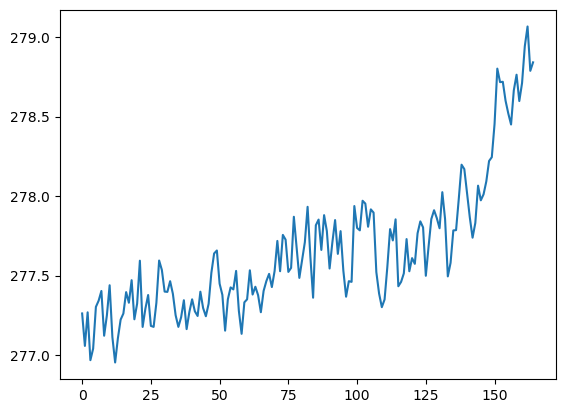

In [19]:
plt.plot(CMIP_mean_temps)